## Classification (with deleted missing data)

In [14]:
import pandas as pd
import numpy as np
all_data=pd.read_csv('PRSA_data.csv')

In [15]:
#Four dummy variables are introduced to deal with 'cbwd'
all_data['cvornot']=all_data['cbwd']=='cv'
for i in range(len(all_data)):
    if all_data['cvornot'][i]==True:
        all_data['cvornot'][i]=1
    else:
        all_data['cvornot'][i]=0

all_data['NEornot']=all_data['cbwd']=='NE'
for i in range(len(all_data)):
    if all_data['NEornot'][i]==True:
        all_data['NEornot'][i]=1
    else:
        all_data['NEornot'][i]=0

all_data['NWornot']=all_data['cbwd']=='NW'
for i in range(len(all_data)):
    if all_data['NWornot'][i]==True:
        all_data['NWornot'][i]=1
    else:
        all_data['NWornot'][i]=0

all_data['SEornot']=all_data['cbwd']=='SE'
for i in range(len(all_data)):
    if all_data['SEornot'][i]==True:
        all_data['SEornot'][i]=1
    else:
        all_data['SEornot'][i]=0

C:\Users\86180\AppData\Local\Temp/ipykernel_18224/3183737851.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['cvornot'][i]=0
c:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\86180\AppData\Local\Temp/ipykernel_18224/3183737851.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['NEornot']

In [16]:
all_data['nightornot']=all_data['hour']<6 #treat 0 1 2 3 4 5 as night
for i in range(len(all_data)):
    if all_data['nightornot'][i]==True:
        all_data['nightornot'][i]=1
    else:
        all_data['nightornot'][i]=0

all_data['morningornot']=(all_data['hour']>5)&(all_data['hour']<12)  #treat 6 7 8 9 10 11 as morning
for i in range(len(all_data)):
    if all_data['morningornot'][i]==True:
        all_data['morningornot'][i]=1
    else:
        all_data['morningornot'][i]=0

all_data['afternoonornot']=(all_data['hour']>11)&(all_data['hour']<18)  #treat 12 13 14 15 16 17 as afternoon 
for i in range(len(all_data)):
    if all_data['afternoonornot'][i]==True:
        all_data['afternoonornot'][i]=1
    else:
        all_data['afternoonornot'][i]=0

all_data['eveningornot']=(all_data['hour']>17)  #treat 18 19 20 21 22 23 24 as evening
for i in range(len(all_data)):
    if all_data['eveningornot'][i]==True:
        all_data['eveningornot'][i]=1
    else:
        all_data['eveningornot'][i]=0

C:\Users\86180\AppData\Local\Temp/ipykernel_18224/397320567.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['nightornot'][i]=1
c:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\86180\AppData\Local\Temp/ipykernel_18224/397320567.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['morningo

In [17]:
#let DEWP, TEMP, PRES, Iws, Is, Ir be smoothed
from copy import deepcopy
all_data['new_DEWP']=deepcopy(all_data['DEWP'])
all_data['new_TEMP']=deepcopy(all_data['TEMP'])
all_data['new_PRES']=deepcopy(all_data['PRES'])
all_data['new_Iws']=deepcopy(all_data['Iws'])
all_data['new_Is']=deepcopy(all_data['Is'])
all_data['new_Ir']=deepcopy(all_data['Ir'])

for i in all_data.index:
    if i!=0 and i!=len(all_data)-1:
        all_data['new_DEWP'][i]=(all_data['DEWP'][i-1]+all_data['DEWP'][i]+all_data['DEWP'][i+1])/3
        all_data['new_TEMP'][i]=(all_data['TEMP'][i-1]+all_data['TEMP'][i]+all_data['TEMP'][i+1])/3
        all_data['new_PRES'][i]=(all_data['PRES'][i-1]+all_data['PRES'][i]+all_data['PRES'][i+1])/3
        all_data['new_Iws'][i]=(all_data['Iws'][i-1]+all_data['Iws'][i]+all_data['Iws'][i+1])/3
        all_data['new_Is'][i]=(all_data['Is'][i-1]+all_data['Is'][i]+all_data['Is'][i+1])/3
        all_data['new_Ir'][i]=(all_data['Ir'][i-1]+all_data['Ir'][i]+all_data['Ir'][i+1])/3
    else:
        all_data['new_DEWP'][i]=all_data['DEWP'][i]
        all_data['new_TEMP'][i]=all_data['TEMP'][i]
        all_data['new_PRES'][i]=all_data['PRES'][i]
        all_data['new_Iws'][i]=all_data['Iws'][i]
        all_data['new_Is'][i]=all_data['Is'][i]
        all_data['new_Ir'][i]=all_data['Ir'][i]

all_data['DEWP']=deepcopy(all_data['new_DEWP'])
all_data['TEMP']=deepcopy(all_data['new_TEMP'])
all_data['PRES']=deepcopy(all_data['new_PRES'])
all_data['Iws']=deepcopy(all_data['new_Iws'])
all_data['Is']=deepcopy(all_data['new_Is'])
all_data['Ir']=deepcopy(all_data['new_Ir'])
        
all_data.drop(columns=['new_DEWP','new_TEMP','new_PRES','new_Iws','new_Is','new_Ir'],inplace=True)

C:\Users\86180\AppData\Local\Temp/ipykernel_18224/18191542.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['new_DEWP'][i]=all_data['DEWP'][i]
C:\Users\86180\AppData\Local\Temp/ipykernel_18224/18191542.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['new_TEMP'][i]=all_data['TEMP'][i]
C:\Users\86180\AppData\Local\Temp/ipykernel_18224/18191542.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['new_P

In [18]:
#delete the missing data
all_data=all_data.dropna(how='any')

In [19]:
#用lof算法识别离群值,并除去
from sklearn.neighbors import LocalOutlierFactor
model= LocalOutlierFactor(n_neighbors=60, contamination=0.2)  #由于样本数量较多，我们保留约五分之四的数据
all_data['outlierornot']=model._fit_predict(all_data.iloc[:,[5,6,7,8,10,11,12,13,14,15,16,17,18,19,20]])
for i in all_data.index:
    if all_data['outlierornot'][i]==-1:
        all_data.drop(index=i,inplace=True)
for i in all_data.index:
    if ((all_data['pm2.5'][i]==0)|(all_data['pm2.5'][i]<0)):
        all_data.drop(index=i,inplace=True)

In [20]:
all_data['label']=all_data['pm2.5']==0
for i in all_data.index:
    if all_data['pm2.5'][i]<=35:
        all_data['label'][i]=1   #low
    elif  all_data['pm2.5'][i]>150:
        all_data['label'][i]=3   #very high
    else:
        all_data['label'][i]=2  

C:\Users\86180\AppData\Local\Temp/ipykernel_18224/1911454641.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['label'][i]=2
c:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [22]:
#splitting data to X and y
from scipy import stats
all_data_X=all_data[['year','month','day','DEWP','TEMP','PRES','Iws','Is','Ir','cvornot','NEornot','NWornot','SEornot','nightornot','morningornot','afternoonornot','eveningornot']]
all_data_y=all_data[['year','month','day','label']]

In [23]:
#divide all data into training set and test set
import copy
from datetime import date
train_data_task5_1_X=copy.deepcopy(all_data_X)
test_data_task5_1_X=copy.deepcopy(all_data_X)
train_data_task5_1_y=copy.deepcopy(all_data_y)
test_data_task5_1_y=copy.deepcopy(all_data_y)
for i in all_data.index:
   if date(all_data['year'][i],all_data['month'][i],all_data['day'][i]).weekday()==3:
      train_data_task5_1_X.drop(index=i,inplace=True)
      train_data_task5_1_y.drop(index=i,inplace=True)
   else:
      test_data_task5_1_X.drop(index=i,inplace=True)
      test_data_task5_1_y.drop(index=i,inplace=True)

In [24]:
from catboost import CatBoostClassifier
score=pd.DataFrame(columns=['learning_rate','score'])
for i in range(-10,11):
    ctc=CatBoostClassifier(n_estimators=1105,max_depth=6,learning_rate=0.044025+i*0.001/20)
    ctc.fit(train_data_task5_1_X,train_data_task5_1_y['label'])
    new=pd.DataFrame({'learning_rate':0.044025+i*0.001/20,'score':ctc.score(test_data_task5_1_X,test_data_task5_1_y['label'])},index=[1])
    score=score.append(new,ignore_index=True)

0:	learn: 1.0749457	total: 16.3ms	remaining: 17.9s
1:	learn: 1.0529164	total: 28.4ms	remaining: 15.7s
2:	learn: 1.0329525	total: 41.7ms	remaining: 15.3s
3:	learn: 1.0150425	total: 53.3ms	remaining: 14.7s
4:	learn: 0.9971739	total: 64.3ms	remaining: 14.1s
5:	learn: 0.9820720	total: 76.1ms	remaining: 13.9s
6:	learn: 0.9679823	total: 87.4ms	remaining: 13.7s
7:	learn: 0.9539951	total: 98.3ms	remaining: 13.5s
8:	learn: 0.9416032	total: 109ms	remaining: 13.3s
9:	learn: 0.9284510	total: 120ms	remaining: 13.2s
10:	learn: 0.9176045	total: 132ms	remaining: 13.1s
11:	learn: 0.9073399	total: 146ms	remaining: 13.3s
12:	learn: 0.8979801	total: 157ms	remaining: 13.2s
13:	learn: 0.8877405	total: 170ms	remaining: 13.2s
14:	learn: 0.8796140	total: 184ms	remaining: 13.3s
15:	learn: 0.8713601	total: 196ms	remaining: 13.3s
16:	learn: 0.8636162	total: 208ms	remaining: 13.3s
17:	learn: 0.8571648	total: 220ms	remaining: 13.3s
18:	learn: 0.8483677	total: 231ms	remaining: 13.2s
19:	learn: 0.8425530	total: 245ms

In [25]:
score

,learning_rate,score
0,0.043525,0.758448
1,0.043575,0.761994
2,0.043625,0.761368
3,0.043675,0.760117
4,0.043725,0.759908
5,0.043775,0.761577
6,0.043825,0.762829
7,0.043875,0.762411
8,0.043925,0.758239
9,0.043975,0.760951


In [27]:
ctc=CatBoostClassifier(n_estimators=1105,max_depth=6,learning_rate=0.044375)
ctc.fit(train_data_task5_1_X,train_data_task5_1_y['label'])
ctc.score(train_data_task5_1_X,train_data_task5_1_y['label']),ctc.score(test_data_task5_1_X,test_data_task5_1_y['label'])

0:	learn: 1.0744940	total: 18ms	remaining: 19.8s
1:	learn: 1.0520874	total: 25.5ms	remaining: 14s
2:	learn: 1.0318164	total: 33.3ms	remaining: 12.2s
3:	learn: 1.0136562	total: 40.9ms	remaining: 11.3s
4:	learn: 0.9955614	total: 49.1ms	remaining: 10.8s
5:	learn: 0.9802956	total: 57.3ms	remaining: 10.5s
6:	learn: 0.9660658	total: 65.8ms	remaining: 10.3s
7:	learn: 0.9519497	total: 74ms	remaining: 10.2s
8:	learn: 0.9394640	total: 82.1ms	remaining: 10s
9:	learn: 0.9262092	total: 89.9ms	remaining: 9.84s
10:	learn: 0.9153034	total: 97.9ms	remaining: 9.73s
11:	learn: 0.9049983	total: 106ms	remaining: 9.62s
12:	learn: 0.8956094	total: 113ms	remaining: 9.49s
13:	learn: 0.8853271	total: 120ms	remaining: 9.38s
14:	learn: 0.8771817	total: 128ms	remaining: 9.29s
15:	learn: 0.8687971	total: 135ms	remaining: 9.18s
16:	learn: 0.8610601	total: 143ms	remaining: 9.13s
17:	learn: 0.8546149	total: 150ms	remaining: 9.05s
18:	learn: 0.8457836	total: 158ms	remaining: 9.04s
19:	learn: 0.8397795	total: 166ms	rema

(0.8571528433120129, 0.7636629119732999)

In [113]:
import matplotlib.pyplot as pl
from sklearn import metrics

def plot_matrix(y_true, y_pred, labels_name, title=None, thresh=0.7, axis_labels=None):
    cm = metrics.confusion_matrix(y_true, y_pred, labels=labels_name, sample_weight=None)  # 生成混淆矩阵 
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]  # 归一化后的混淆矩阵的第i行第j列为真实标签为i的样本被预测为j类的比例
    pl.figure(dpi=160)
    pl.imshow(cm, interpolation='nearest', cmap=pl.get_cmap('YlOrBr'))
    pl.colorbar()  # 绘制图例
    pl.title(title)
    num_local = np.array(range(len(labels_name)))
    if axis_labels is None:
        axis_labels = labels_name
    pl.xticks(num_local, axis_labels)
    pl.yticks(num_local, axis_labels)  # 将标签印在y轴坐标上
    pl.ylabel('True label')
    pl.xlabel('Predicted label')
    for i in range(np.shape(cm)[0]):
        for j in range(np.shape(cm)[1]):
            if cm[i][j]> 0:
                pl.text(j, i, format(round(cm[i][j] * 100,4)) + '%',
                        ha="center", va="center",
                        color="black" if cm[i][j] > thresh else "grey")
# 显示
    pl.show()

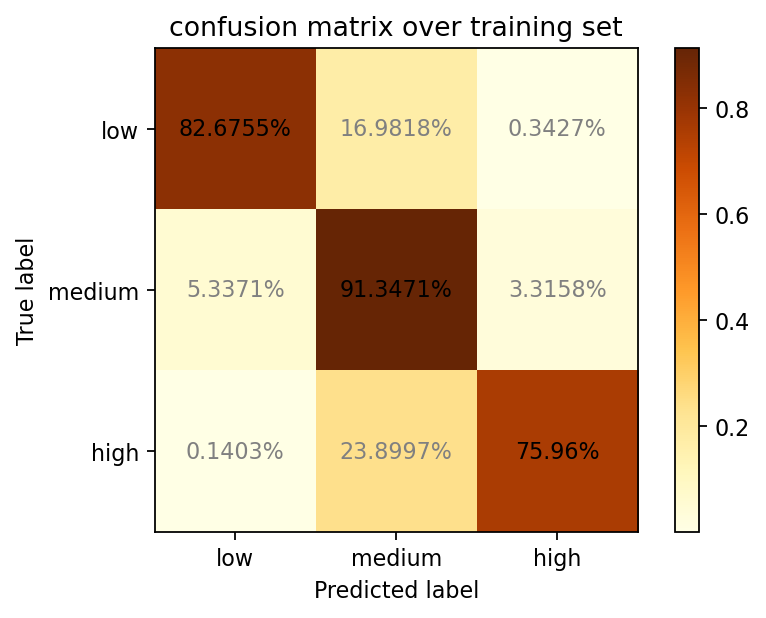

In [114]:
plot_matrix(train_data_task5_1_y['label'].astype(int),ctc.predict(train_data_task5_1_X), [1, 2, 3], title='confusion matrix over training set',
            axis_labels=['low', 'medium', 'high'])     

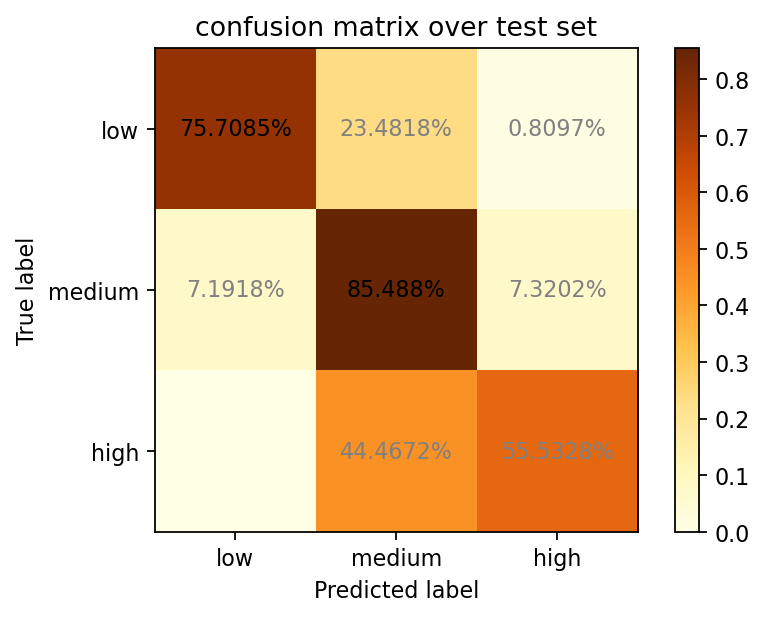

In [116]:
plot_matrix(test_data_task5_1_y['label'].astype(int),ctc.predict(test_data_task5_1_X), [1, 2, 3], title='confusion matrix over test set',
            axis_labels=['low', 'medium', 'high']) 